# IncrementalInference-DPR-NQ-DEV

- Plot incremental_inference
- NQ dev set
- k from 1 to 100

In [1]:
from cycler import cycler
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pathlib
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import re
from util import utils

In [2]:
raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]


light_palette = np.array(raw_light_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255

Light mode palette


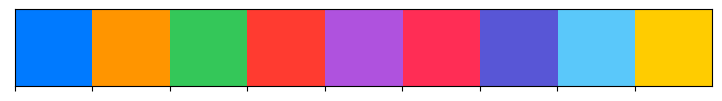

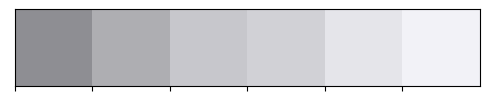

In [3]:
print('Light mode palette')
sns.palplot(light_palette)
sns.palplot(gray_light_palette)

In [4]:
# cmap 수정
mpl.rcParams['axes.prop_cycle'] = cycler('color',light_palette)
# 해상도 조정
mpl.rcParams['figure.dpi'] = 200
# ax의 우측과 상단 지우기
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

## KILT BM25 NQ negative (from DPR) depreciated

In [5]:
# option = 'bm25'
# path = '/data/philhoon-relevance/FiD/results/KILT_DPR_NQ'
# # path = '/data/philhoon-relevance/FiD/results/KILT_DPR_NQ_depreciated'
# plot_path = './img/FiDResultOnBM25HardnegativeNQdevSubsets.png'
# title = 'FiD result on BM25 negative nq dev subsets'

## KILT Random Sampling NQ negative  depreciated

In [6]:
# option = 'random'
# path = '/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ'
# plot_path = './img/FiDResultOnRandomSamplingnegativeNQdevSubsets.png'
# title = 'FiD result on random sampling negative nq dev subsets'

## KILT BM25 NQ negative (from DPR)

In [7]:
# option = 'bm25'
# path = '/data/philhoon-relevance/FiD/results/KILT_BM25_NQ'

## KILT Random Sampling NQ negative 

In [8]:
# option = 'random'
# path = '/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ'
# plot_path = './img/New_FiDResultOnRandomSamplingnegativeNQdev2539.png'
# title = 'New FiD result on random sampling negative nq dev subsets'

## NQ dev DPR retrieved Data

In [9]:
path = '/data/philhoon-relevance/FiD/results/NQ_DPR/DEV'
title = 'FiD result by number of passage on DPR retrieved dataset'
path = pathlib.Path(path)

In [10]:
path = pathlib.Path(path)

In [11]:
files = path.glob('**/final_output.txt')
check_lst = list(files)
print(len(check_lst))
# pprint(check_lst)

100


In [12]:
len(check_lst)

100

In [13]:
dict_eval = {
    'ctx' : [],
    'em' : []
}

sample_size = 100

for ctx in range(1, sample_size+1):
    file_name_ = f'NQ_dev_{ctx}_context'
    file_path = list(path.glob(f'**/{file_name_}*/*.txt'))
    
    test = file_path[0]
        
    df = pd.read_csv(test, sep = '\t', header=None)
    df.columns = ['id','inference','em']
#     print(len(df))
    em = float(sum(df['em'])/len(df))
        
    dict_eval['ctx'].append(ctx)
    dict_eval['em'].append(em)
        
        

In [14]:
len(dict_eval['em'])

100

# merge final_output.txt files

In [15]:
path = '/data/philhoon-relevance/FiD/results/NQ_DPR/DEV'
title = 'FiD result by number of passage on DPR retrieved dataset'
path = pathlib.Path(path)
sample_size = 100

In [16]:
# def merge_output(path, sample_size):
#     id_lst = []
#     inference_lst = []
#     em_lst = []
    
#     for ctx in range(pos, sample_size+1):
#         file_pattern = f'./kilt_bm25_nq_dev_pos{pos}_context{ctx}/final_output.txt'
#         print(file_pattern)
#         output_file = list(path.glob(file_pattern))
#         test = output_file[0]
#         df = pd.read_csv(test, sep = '\t', header=None)
#         df.columns = ['id','inference','em']

#         if not id_lst:
#             id_lst = df.id.to_list()
#         inference_lst.append(df.inference.to_list())
#         em_lst.append(df.em.to_list())
    
#     return id_lst, inference_lst, em_lst
    

In [17]:
# id_lst = []
# inference_lst = []
# em_lst = []

In [18]:
# for ctx in range(1, sample_size+1):
#     file_name_ = f'NQ_dev_{ctx}_context'
#     file_path = list(path.glob(f'**/{file_name_}*/*.txt'))
#     test = file_path[0]
    
#     df = pd.read_csv(test, sep = '\t', header=None)
#     df.columns = ['id','inference','em']

#     if not id_lst:
#         id_lst = df.id.to_list()
#     inference_lst.append(df.inference.to_list())
#     em_lst.append(df.em.to_list())
#     return id_lst, inference_lst, em_lst

In [19]:
def merge_output(path, sample_size):
    id_lst = []
    inference_lst = []
    em_lst = []
    
    for ctx in range(1, sample_size+1):
        file_name_ = f'NQ_dev_{ctx}_context'
        file_path = list(path.glob(f'**/{file_name_}*/*.txt'))
        test = file_path[0]

        df = pd.read_csv(test, sep = '\t', header=None)
        df.columns = ['id','inference','em']

        if not id_lst:
            id_lst = df.id.to_list()
        inference_lst.append(df.inference.to_list())
        em_lst.append(df.em.to_list())
    return id_lst, inference_lst, em_lst
    

In [20]:
id_, infer_, em_ = merge_output(path, sample_size)

In [21]:
def get_em_result(em_zip):
    cul_cnt = 0
    cul_em = []
    conversion = []
    for em in em_zip:
        if '1' in em:
            cul_em.append('1')
            cul_cnt += 1
        else:
            cul_em.append('0')

        conversion.append(len(re.findall(r'10', em)))
    
    return cul_em, conversion, cul_cnt

In [22]:
# em_pattern
em_zip = list(map(lambda line: ''.join(map(lambda s: str(1) if s else str(0), line)), zip(*em_)))

# inference
infer_zip = list(map(list, zip(*infer_)))

# cumulative_em, conversion
cul_em_lst, conversion_lst, cul_cnt = get_em_result(em_zip)

In [23]:
def get_merged_result(id_, em_zip, infer_zip, conversion_lst, cul_em_lst):
    result = {}
    for query_id, em_pattern, inference, conversion, cumulative_em in zip(id_, em_zip, infer_zip, conversion_lst, cul_em_lst):
        template = {
            'em_pattern' : em_pattern,
            'inference' : inference,
            'conversion' : conversion,
            'cumulative_em' : cumulative_em
        }
        result[str(query_id)] = template
    return result

In [24]:
result = get_merged_result(id_, em_zip, infer_zip, conversion_lst, cul_em_lst)

### merge above outputs to orignal file

In [25]:
nq_dev_file = '/data/philhoon-relevance/FiD/open_domain_data/NQ/dev.json'
sample_size = 100

In [26]:
nq_dev_format = utils.open_json(nq_dev_file)

In [27]:
# pprint(len(result))

In [28]:
# result['0']

In [29]:
pprint(len(nq_dev_format))

8757


In [30]:
# pprint(nq_dev_format[0].keys())

In [31]:
def merge_with_input(nq_dev_format, result, sample_size):
    for idx, dev_example in enumerate(nq_dev_format):
        id_ = str(idx)
        if id_ in result.keys():
            dev_example['ctxs'] = dev_example['ctxs'][:sample_size]
            dev_example['em_pattern'] = result[id_]['em_pattern']
            dev_example['inference'] = result[id_]['inference']
            dev_example['conversion'] = result[id_]['conversion']
            dev_example['cumulative_em'] = result[id_]['cumulative_em']
        else:
            print('ID not exist. Mathcing ID required')
    return nq_dev_format

In [32]:
final_output = merge_with_input(nq_dev_format, result, sample_size)

In [33]:
# len(final_output)

In [34]:
# pprint(final_output[0])

In [35]:
# path = '/data/philhoon-relevance/FiD/results/NQ_DPR/DEV'

In [36]:
output_file_path = f'/data/philhoon-relevance/FiD/results/NQ_DPR/DEV/incremental_result_100/ctx{sample_size}.json'
output_txt_path = f'/data/philhoon-relevance/FiD/results/NQ_DPR/DEV/incremental_result_100/ctx{sample_size}.txt'

In [37]:
# utils.save_json(final_output, output_file_path)

In [38]:
cul_cnt = 0
for ins in final_output:
    cul_cnt += int(ins['cumulative_em'])
cul_score = cul_cnt/len(final_output)
output_string = f'Out of {len(final_output)} instances; {cul_cnt} are incrementally correct : {cul_score} in EM'

In [39]:
output_string

'Out of 8757 instances; 5456 are incrementally correct : 0.6230444216055727 in EM'

In [40]:
# with open(output_txt_path, "w") as file:
#     file.write(output_string)

## NQ dev DPR incremetal result 

In [41]:
def extract_em_pattern(final_output):
    em_pattern_lst = []
    for instance in final_output:
        em_pattern_lst.append(instance['em_pattern'])
    return em_pattern_lst

In [42]:
em_pattnern_lst = extract_em_pattern(final_output)

In [43]:
len(em_pattnern_lst)

8757

In [44]:
def get_accumulated_em(em_pattnern_lst, sample_size):
    incre_em = {
        'ctx' : [],
        'em' : [],   
    }
    for ctx in range(1, sample_size+1):
        incre_em['ctx'].append(ctx)
        cnt = 0
        for pattern in em_pattnern_lst:
            if '1' in pattern[:ctx]:
                cnt += 1
        incre_em['em'].append(cnt/len(em_pattnern_lst))
    return incre_em

In [45]:
incre_em = get_accumulated_em(em_pattnern_lst, sample_size)

## Plot

In [46]:
plot_path = './img/NQ_DEV_DPR_AcEM_EM_100.png'
title = 'FiD result on NQ DEV DPR'

In [47]:
df_normal = pd.DataFrame(data=dict_eval)
# print(dict_eval)

In [48]:
df_incre = pd.DataFrame(data=incre_em)
# print(dict_eval)

In [49]:
# df_incre

In [50]:
# pos_set = set(df['pos'])

In [51]:
# from cycler import cycler
# # marker='*',
# # default_cycler = (cycler(markers=['1', '2', '3' ,'4','8']))
# # c = plt.cycler(color=["Blue", "Orange", "Green",'Red','Purple'],
# #                markersize=[10, 10, 10, 10, 10],
# #                marker=["o", "s", "^", '1', '3'])
# # plt.rcParams["axes.prop_cycle"] = c

# # plt.rc('axes', prop_cycle=default_cycler)

In [52]:
# df

In [53]:
# selected_data = df.loc[df['pos'] == pos]

In [54]:
# selected_data

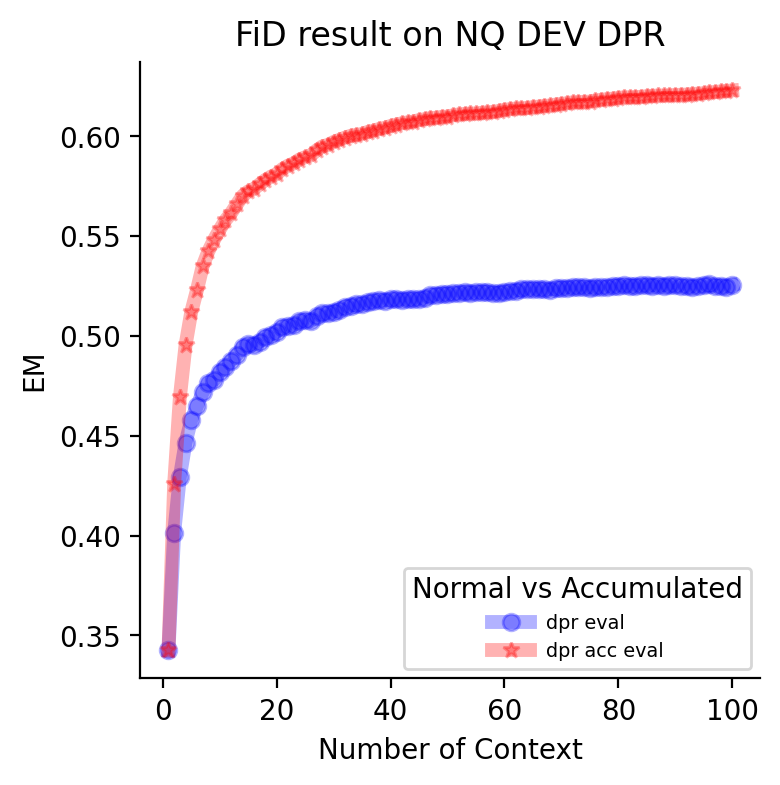

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# ax.plot(df['ctx'], selected_data['em'], label=pos, alpha = 0.5, linewidth=5)
ax.plot(df_normal['ctx'],df_normal['em'], label='dpr eval', alpha = 0.3, linewidth=5, color = 'blue', marker = "o")    
ax.plot(df_incre['ctx'],df_incre['em'], label='dpr acc eval', alpha = 0.3, linewidth=5, color = 'red', marker = "*")
# ax.set_title('FiD result on BM25 hard negative nq dev subsets')
ax.set_title(title)
ax.legend(title='Normal vs Accumulated', fontsize = 'x-small')
plt.ylabel('EM')
plt.xlabel('Number of Context')
# plt.savefig(plot_path, dpi=300)
plt.show()

In [1]:
df_normal

NameError: name 'df_normal' is not defined